# 07TestCOVID19

# Libraries

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime

from IPython.display import display

# Load Data

In [3]:
test = pd.read_csv("C:\py\Projects\TuringCollege\COVID19\DataSets\\test.csv", parse_dates =["date"], index_col ="date")

# Size

In [4]:
test.shape

(163, 6)

# Missing Data

In [5]:
test.isna().sum()

time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

# Data Types

In [6]:
test.dtypes

time         int64
test         int64
negative     int64
confirmed    int64
released     int64
deceased     int64
dtype: object

# Delete Unneeded Columns

In [7]:
test = test.drop(["time", "released", "test", "negative", "deceased"], axis=1)

# Rename Columns

In [8]:
test.rename(
    columns={
        "confirmed": "Confirmed"  
    },
    inplace=True,
)
test.index.names = ['Date']

# The First Five Rows

In [9]:
test.head()

,Confirmed
Date,
2020-01-20,1
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,2


In [10]:
test = test.asfreq(freq='M')
test = test.reset_index()
test['Month'] = test['Date'].dt.strftime('%B')
test

,Date,Confirmed,Month
0,2020-01-31,11,January
1,2020-02-29,3150,February
2,2020-03-31,9786,March
3,2020-04-30,10765,April
4,2020-05-31,11468,May
5,2020-06-30,12800,June


# Visualizations

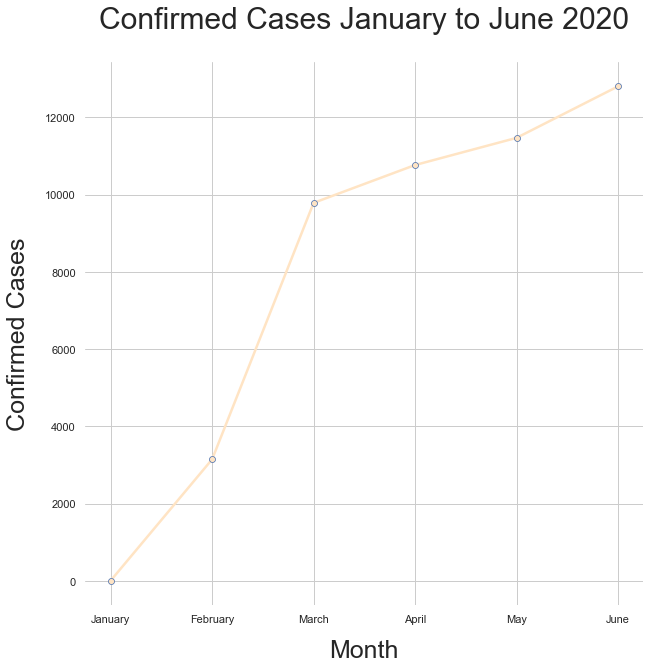

In [18]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
# sns.set_context("paper", font_scale=2.0)

sns.lineplot(x="Month", y="Confirmed", data=test, marker='o', markeredgecolor='b', color="bisque", linewidth=2.5)

plt.xlabel("Month", fontsize=25, labelpad=15)
plt.ylabel("Confirmed Cases", fontsize=25, labelpad=15)

plt.title("Confirmed Cases January to June 2020", fontsize=30, y=1.05)
sns.despine(left=True, bottom=True)